# Grafo dirigido de normas ARN

In [1]:
# bibliotecas
import re
# try:
#   import cv2
# except:
#   !pip install opencv-python
#  import cv2  
import glob

In [2]:
path = "normas_texto/*.txt"

adj_list={}
for file in glob.glob(path):
  with open(file, "r") as f:
      lines = f.readlines()
  texto=" ".join(lines).replace("\n","")
  p = re.compile("AR (\d+\.\d+\.\d+)")
  result = p.findall(texto.upper())
  adj_list[result[0]]=[i for i in result if i!=result[0]]

print(adj_list)

{'3.4.3': ['3.1.3', '3.1.3', '3.1.3'], '4.1.3': [], '3.4.1': ['3.1.3', '3.1.3'], '4.9.1': [], '4.8.1': ['4.7.2', '3.6.1'], '3.2.1': ['3.1.3'], '3.5.1': [], '4.2.1': [], '10.13.2': ['10.13.1', '10.16.1'], '6.7.1': [], '8.11.1': [], '7.11.1': [], '3.2.3': [], '8.2.3': [], '3.3.2': ['3.1.3'], '5.7.1': [], '4.9.2': ['4.2.2'], '3.3.3': [], '8.2.4': [], '3.3.1': ['3.1.3'], '0.0.1': [], '8.11.3': [], '10.10.1': ['3.1.3'], '7.11.2': [], '5.1.1': [], '0.11.1': [], '3.1.1': [], '8.11.2': ['8.11.1', '8.11.1', '8.11.1', '8.11.1', '8.11.1', '8.11.1', '8.11.1', '8.11.1', '8.11.1', '8.11.1', '8.11.1', '8.11.1', '8.11.1', '8.11.1', '8.11.1', '8.11.1', '8.11.1'], '3.10.1': ['3.1.3'], '4.2.3': ['4.5.1'], '3.7.1': [], '8.2.1': ['10.16.1'], '10.1.1': [], '3.1.3': [], '6.1.2': [], '8.2.2': [], '3.6.1': [], '4.8.2': ['4.7.1', '3.6.1'], '4.7.1': [], '10.16.1': [], '3.9.2': [], '7.9.2': ['10.16.1', '10.12.1'], '3.4.2': ['3.1.3'], '4.1.1': [], '10.13.1': [], '6.1.1': [], '10.14.1': [], '4.1.2': [], '2.12.1': [

## Normas sin cita

In [3]:
# number of adj_list without adjacencies
sinCita = 0
for key in adj_list:
  if len(adj_list[key])==0:
    sinCita += 1
print("Proporción de normas si adyacencias: ", sinCita / len(adj_list) * 100, "%")

Proporción de normas si adyacencias:  70.3125 %


## Norma faltante

In [4]:
adj_list['4.8.1']

['4.7.2', '3.6.1']

Apunta a la norma 3.6.1, que no existe en https://www.argentina.gob.ar/arn/instalaciones-practicas-y-personal-regulado/marco-regulatorio/normas.
La busqué con un buscador externo.

Luego de encontrar el pdf y descargarle:
1. la moví al directorio `normas`.
2. le asigné un objetivo (Instalación clase 1)
3. la procesé en https://www.pdfforge.org/online/en/extract-text para obtener el archivo de texto plano `3-6-1_r2.txt` que copié a `normas_texto`

## Grafo no dirigido

In [5]:
try:
  import networkx as nx
except:
  !pip install networkx
  import networkx as nx
import matplotlib.pyplot as plt

In [6]:
G = nx.from_dict_of_lists(adj_list)

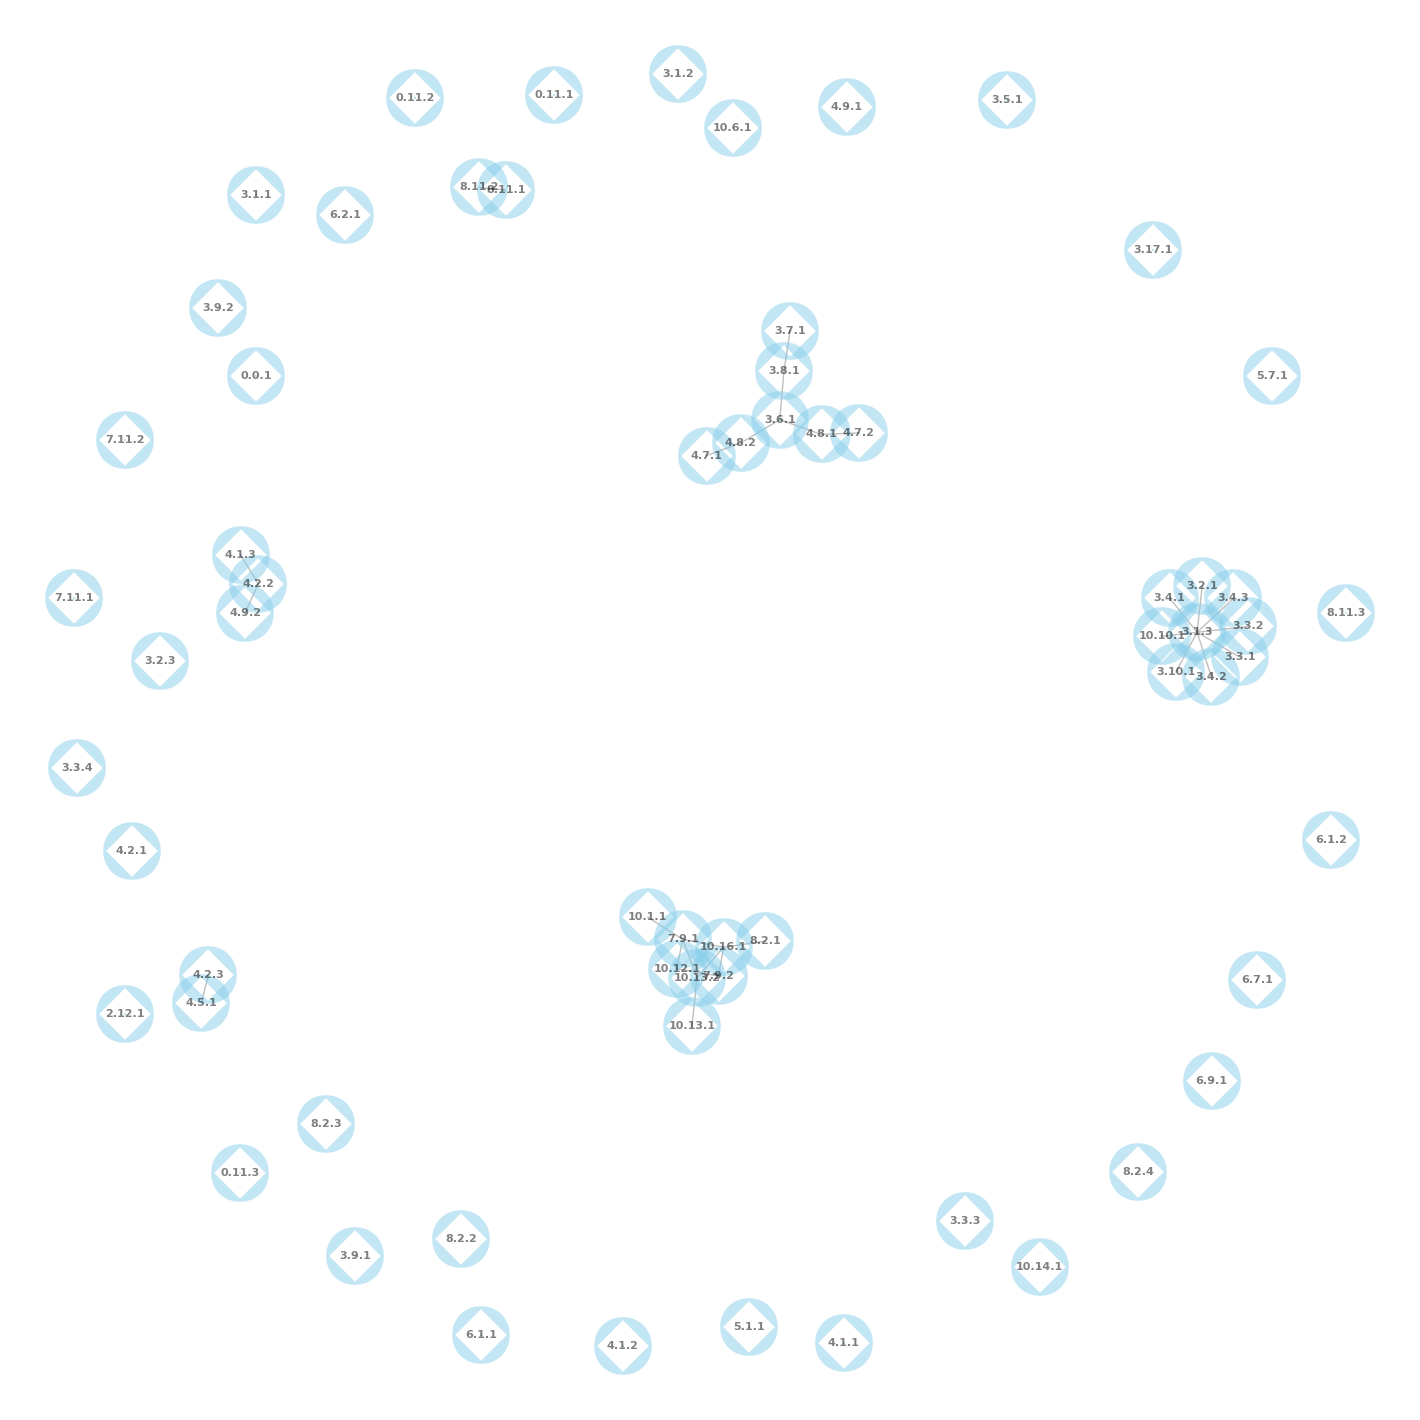

In [7]:
plt.figure(3,figsize=(14,14))
nx.draw(G, with_labels = True, node_size=2, node_color="skyblue", node_shape="s", alpha=0.5, linewidths=40, font_size=8, font_color="black", edge_color="gray", font_weight="bold", font_family="sans-serif")
plt.show()

## Grafo direcionado

In [8]:
# what alternatives are there to the spring layout?
# pos = nx.circular_layout(G)  # positions for all nodes
# pos = nx.random_layout(G)  # positions for all nodes
# pos = nx.shell_layout(G)  # positions for all nodes
# pos = nx.spectral_layout(G)  # positions for all nodes
# pos = nx.spring_layout(G)  # positions for all nodes
# pos = nx.kamada_kawai_layout(G)  # positions for all nodes
# pos = nx.planar_layout(G)  # positions for all nodes
# pos = nx.spiral_layout(G)  # positions for all nodes
# pos = nx.multipartite_layout(G)  # positions for all nodes
# pos = nx.fruchterman_reingold_layout(G)  # positions for all nodes
# pos = nx.shell_layout(G)  # positions for all nodes
# pos = nx.bipartite_layout(G, G.nodes)  # positions for all nodes
# pos = nx.rescale_layout(G)  # positions for all nodes


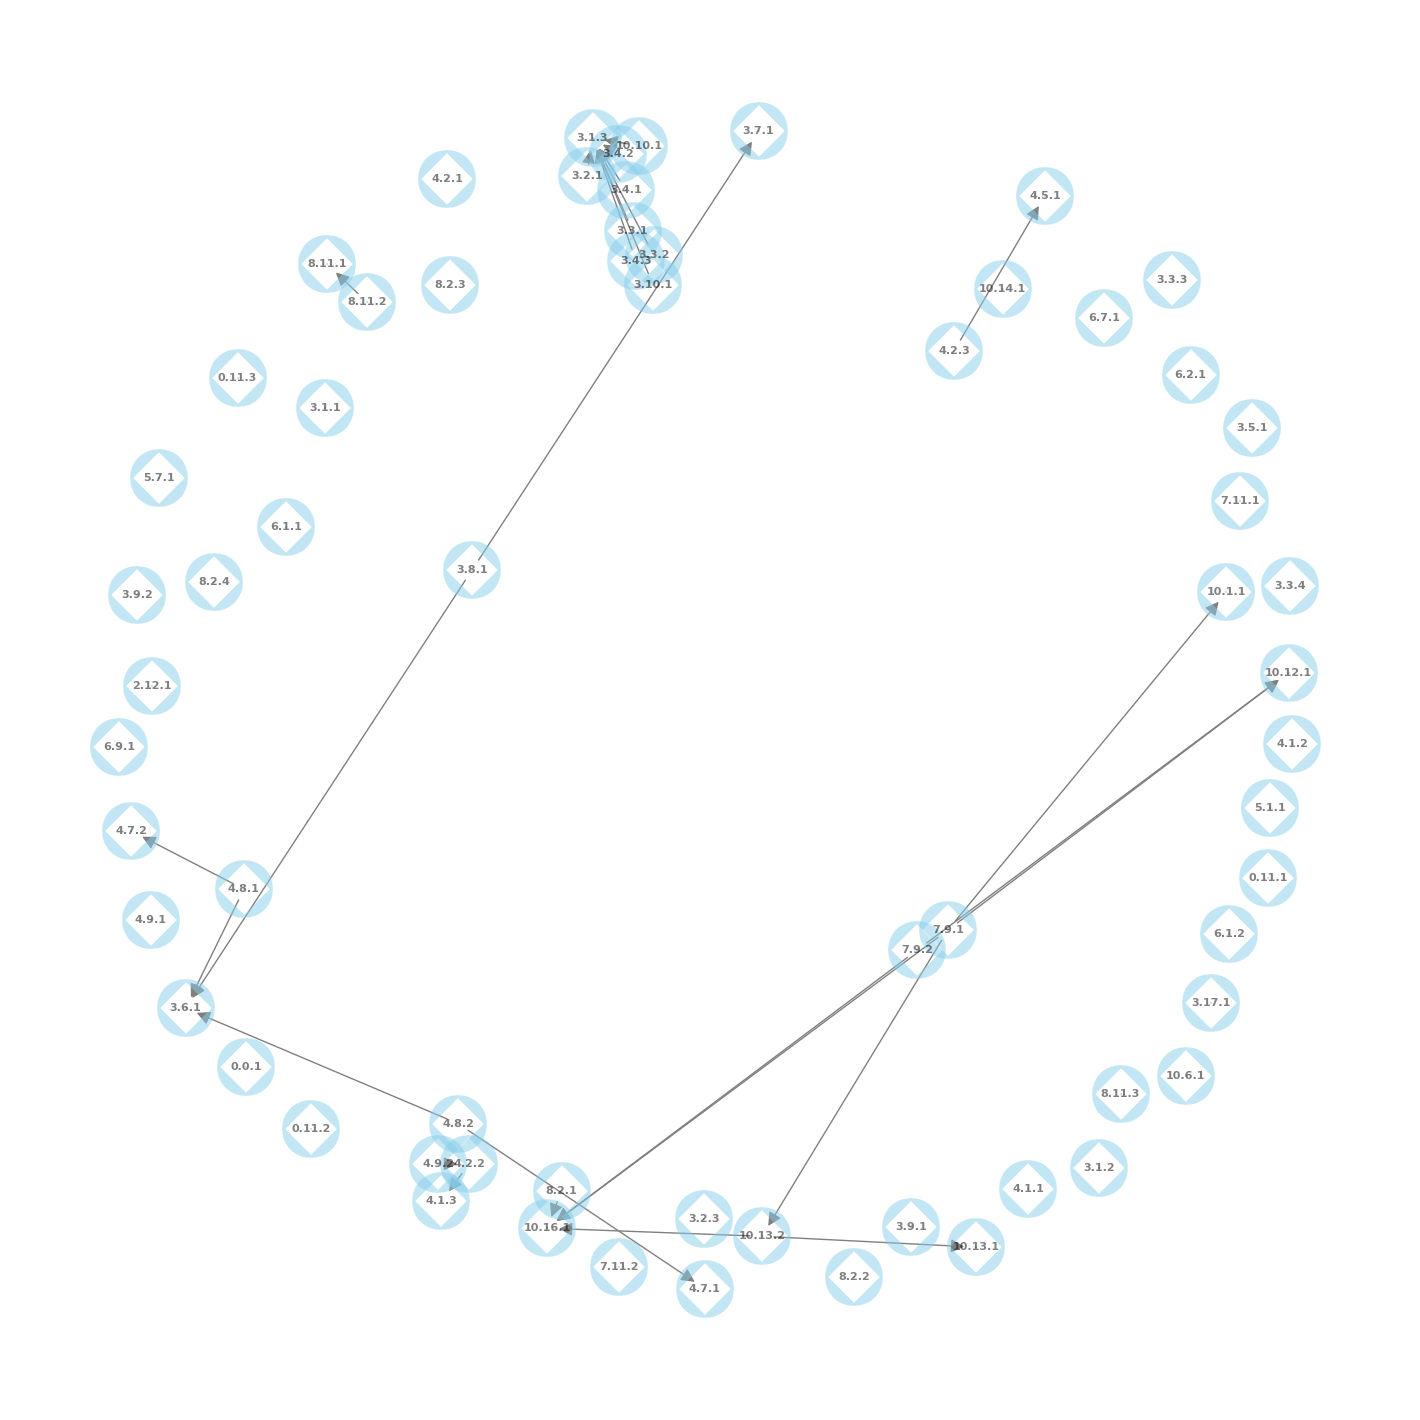

In [9]:
# Create a directed graph from the adjacency list
G = nx.DiGraph(adj_list)

# Draw the directed graph
plt.figure(3,figsize=(14,14))
pos = nx.spring_layout(G)  # positions for all nodes
# pos = nx.fruchterman_reingold_layout(G)  # positions for all nodes
nx.draw(G, pos, with_labels = True, node_size=2, node_color="skyblue", node_shape="s", alpha=0.5, linewidths=40, font_size=8, font_color="black", font_weight="bold", font_family="sans-serif", edgelist= [])
# nx.draw(G, pos, with_labels = True, node_size=2, node_color="skyblue", node_shape="s", alpha=0.5, linewidths=40, font_size=8, font_color="black", font_weight="bold", font_family="sans-serif", edge_color="white")

# Draw directed edges with arrows
nx.draw_networkx_edges(G, pos, arrowstyle='-|>', arrowsize=20, edge_color='gray')

# Show the plot
plt.show()


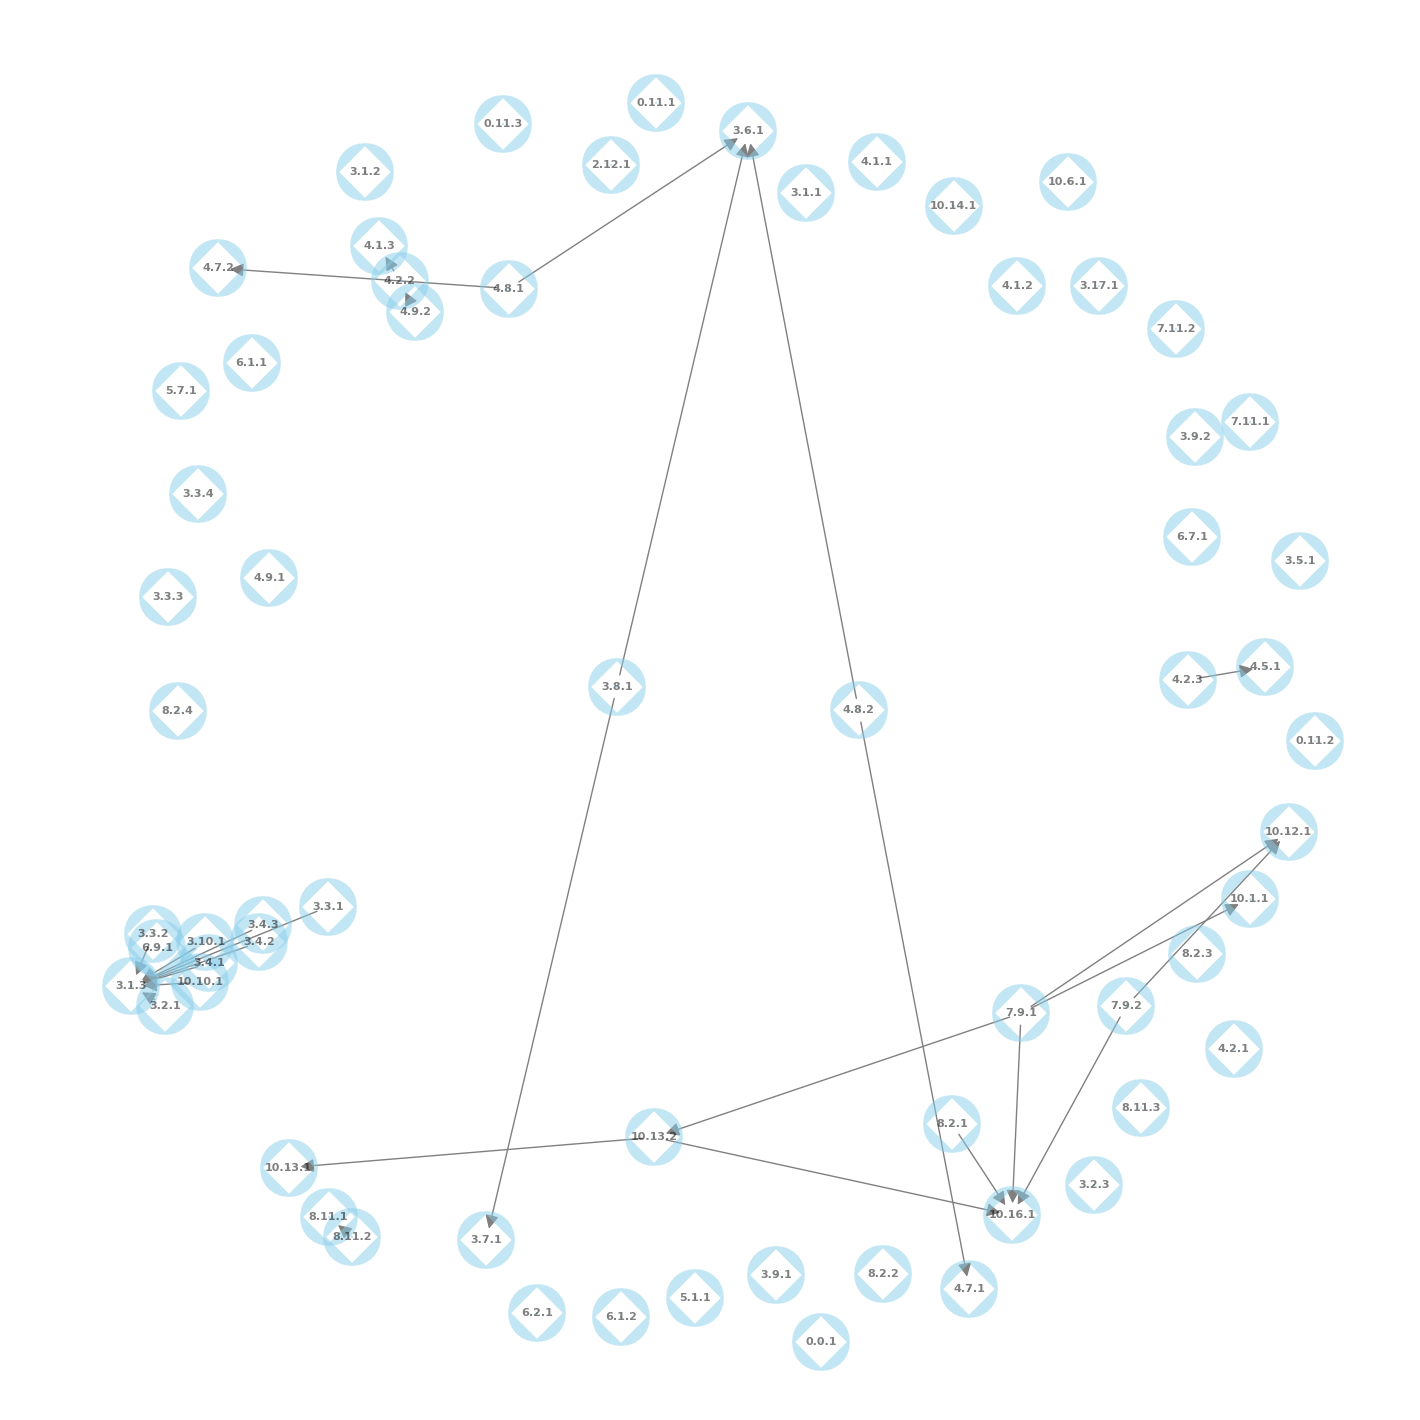

In [10]:
# Create a directed graph from the adjacency list
G = nx.DiGraph(adj_list)

# Draw the directed graph
plt.figure(3,figsize=(14,14))
pos = nx.spring_layout(G)  # positions for all nodes
# pos = nx.fruchterman_reingold_layout(G)  # positions for all nodes
# nx.draw(G, pos, with_labels = True, node_size=2, node_color="skyblue", node_shape="s", alpha=0.5, linewidths=40, font_size=8, font_color="black", font_weight="bold", font_family="sans-serif", edgelist= [])
nx.draw(G, pos, with_labels = True, node_size=2, node_color="skyblue", node_shape="s", alpha=0.5, linewidths=40, font_size=8, font_color="black", font_weight="bold", font_family="sans-serif", edge_color="white")

# Draw directed edges with arrows
nx.draw_networkx_edges(G, pos, arrowstyle='-|>', arrowsize=20, edge_color='gray')

# Show the plot
plt.show()


## Colorear los nodos según la clasificación por objetivo

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

/tmp/ipykernel_86806/1492400551.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [12]:
# Import csv file with column names
dataFileName = 'clasificaciónNormas.csv' 
df = pd.read_csv(dataFileName, names=['Norma', 'Objetivo'])

In [13]:
# uniques in column Objetivo
df['Objetivo'].unique()

array(['Instalaciones clase 1', 'Autorización específica',
       'Entrenamiento de personal', 'Licenciamiento', 'Emplazamiento',
       'Básica seguridad radiológica', 'Gestión de residuos',
       'Seguridad física', 'No desviación de materiales nucleares',
       'Transporte (adoptada)', 'Gestión', 'Protección radiológica',
       'Seguridad', 'Desmantelamiento', 'Criterio de diseño',
       'Documentación', 'Puesta en marcha', 'Comunicación',
       'Permiso individual'], dtype=object)

In [14]:
# check if there are some nodes not presents in the column Norma
for i in G.nodes():
    if i not in df['Norma'].values:
        print(i)

In [15]:
# generate a color_map accounting for the different types found with df['Objetivo'].unique()

colour_map = {
    'Seguridad' : 'red',
    'Protección radiológica' : 'green',
    'Criterio de diseño' : 'blue',
    'Permiso individual' : 'yellow',
    'Documentación' : 'magenta',
    'Instalaciones clase 1' : 'cyan',
    'Puesta en marcha' : 'orange',
    'Seguridad física' : 'brown',
    'Autorización específica' : 'olive',
    'Entrenamiento de personal' : 'salmon',
    'Licenciamiento' : 'lightyellow',
    'Gestión' : 'lightsteelblue',
    'Transporte (adoptada)' : 'lightseagreen',
    'No desviación de materiales nucleares' : 'lightgoldenrodyellow',
    'Gestión de residuos' : 'lightcoral',
    'Emplazamiento' : 'lightpink',
    'Básica seguridad radiológica' : 'lightgray',
    'Desmantelamiento' : 'cornflowerblue',
    'Comunicación' : 'darkgray',
}

In [16]:
# Assign colors to nodes based on their category
node_colours = [colour_map[df.loc[df['Norma'] == node, 'Objetivo'].values[0]] for node in G.nodes()]

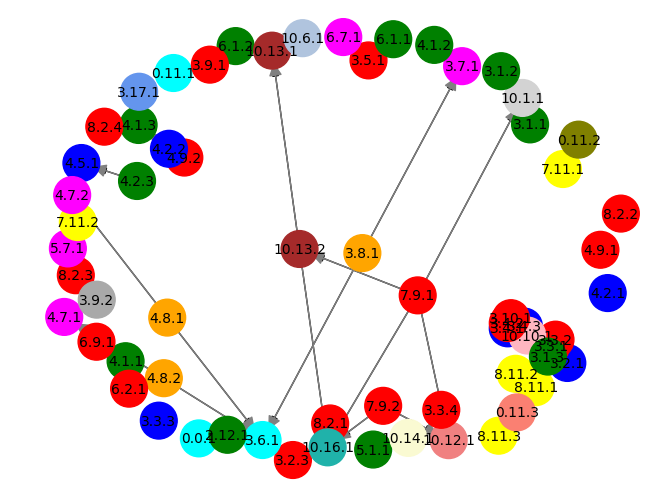

In [17]:
# Draw the directed graph with colored nodes
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw(G, pos, with_labels=True, node_color=node_colours, node_size=700, font_size=10)

# Draw directed edges with arrows
nx.draw_networkx_edges(G, pos, arrowstyle='-|>', arrowsize=20, edge_color='gray')

# Show the plot
plt.show()

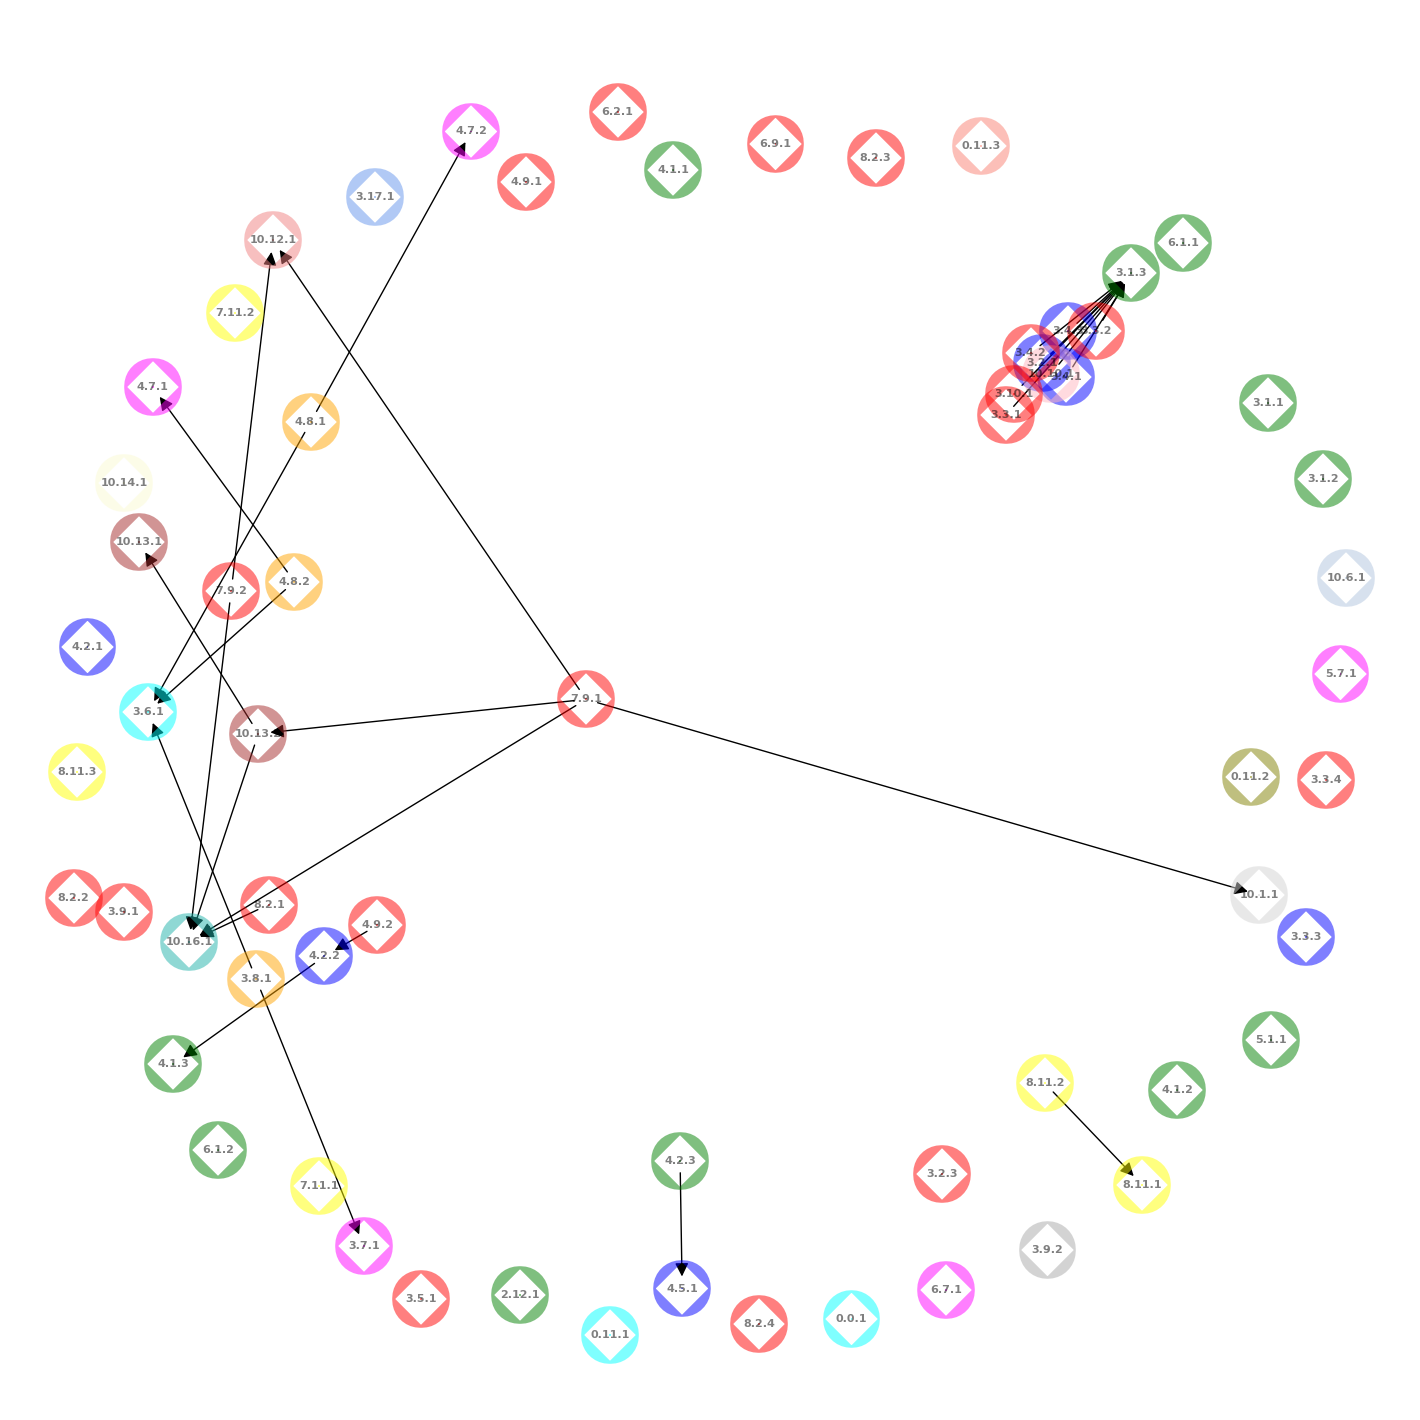

In [18]:
# Create a directed graph from the adjacency list
G = nx.DiGraph(adj_list)

# Draw the directed graph
plt.figure(3,figsize=(14,14))
pos = nx.spring_layout(G)  # positions for all nodes
# pos = nx.fruchterman_reingold_layout(G)  # positions for all nodes
nx.draw(G, pos, with_labels = True, node_size=2, node_color= node_colours, node_shape="s", alpha=0.5, linewidths=40, font_size=8, font_color="black", font_weight="bold", font_family="sans-serif", edgelist= [])
# nx.draw(G, pos, with_labels = True, node_size=2, node_color="skyblue", node_shape="s", alpha=0.5, linewidths=40, font_size=8, font_color="black", font_weight="bold", font_family="sans-serif", edge_color="white")

# Draw directed edges with arrows
nx.draw_networkx_edges(G, pos, arrowstyle='-|>', arrowsize=20, edge_color='black')

# Show the plot
plt.show()


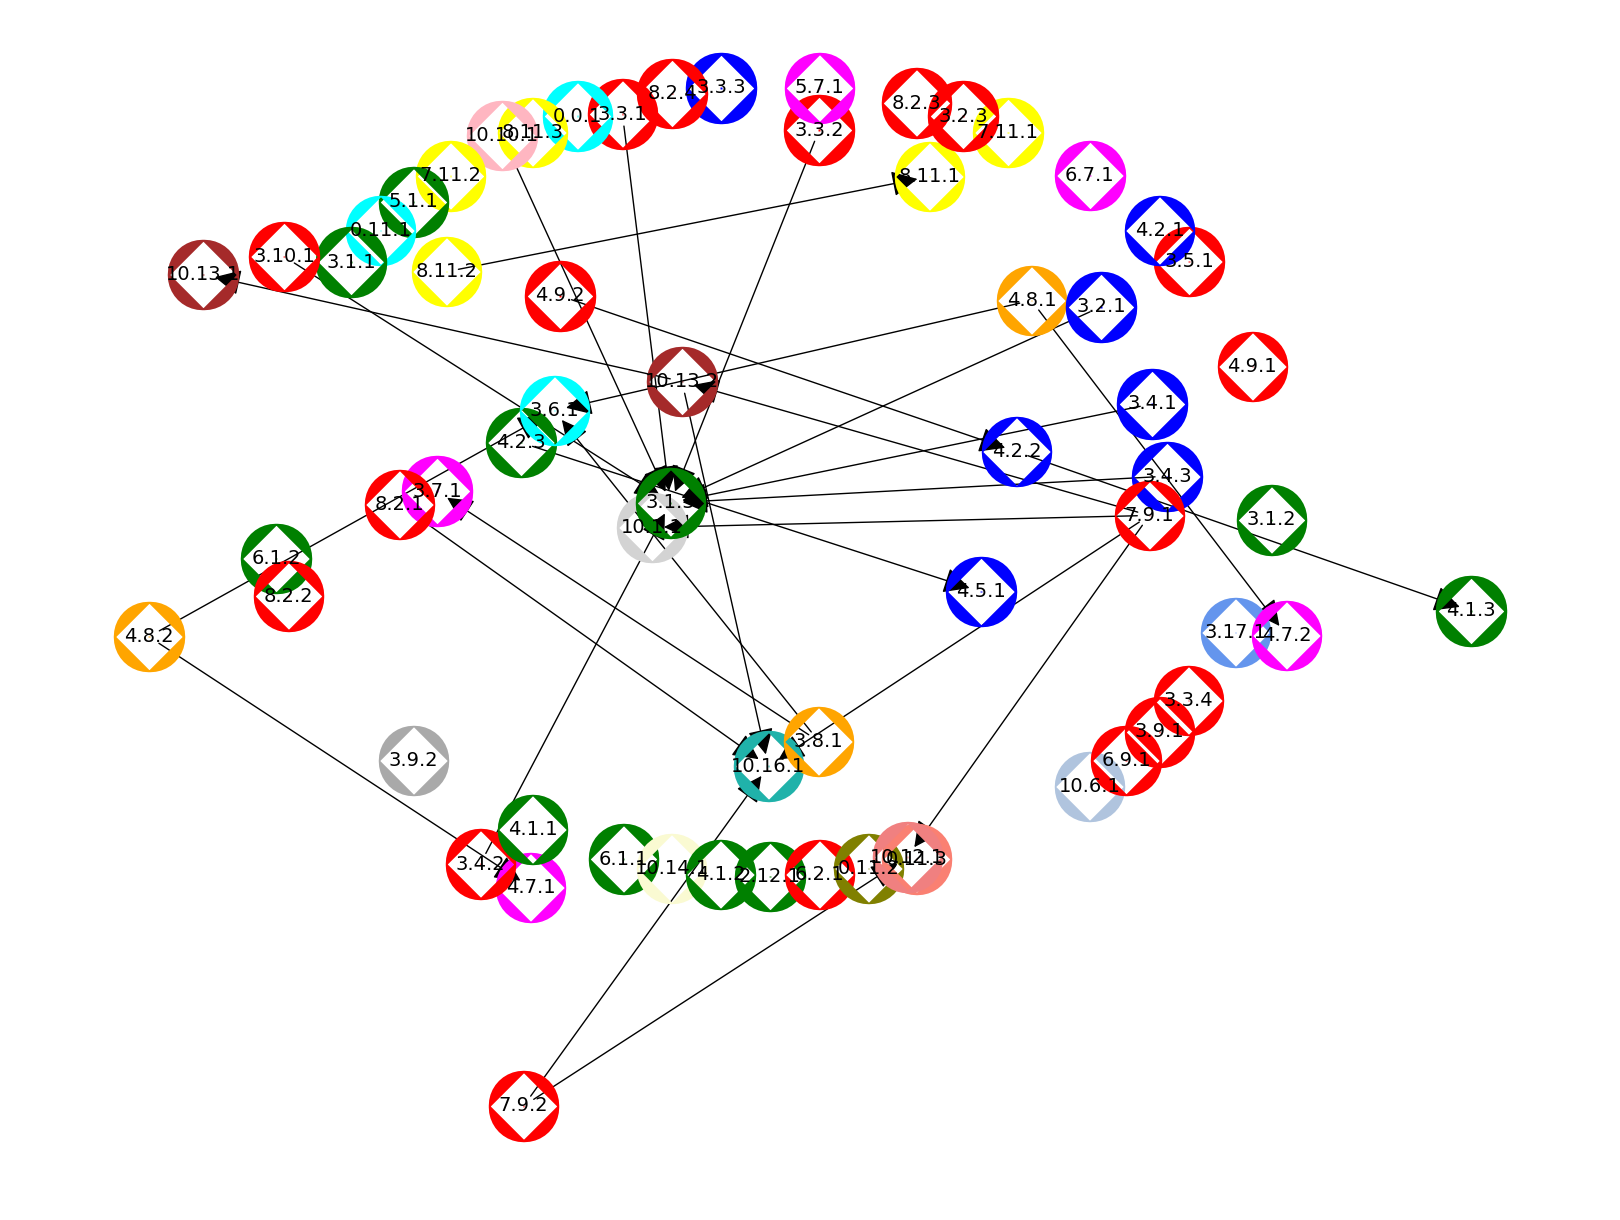

In [19]:
# Create a directed graph from the adjacency list
G = nx.DiGraph(adj_list)

# Draw the directed graph
plt.figure(3,figsize=(16,12))
pos = nx.kamada_kawai_layout(G)  # positions for all nodes
# pos = nx.fruchterman_reingold_layout(G)  # positions for all nodes
# pos = nx.spiral_layout(G)  # positions for all nodes
nx.draw(G, pos, with_labels = True, node_size=1, node_color= node_colours, node_shape="s", alpha=1.0, linewidths=50, font_size=14, font_color="black", font_weight="normal", font_family="sans-serif", edgelist= [])
# nx.draw(G, pos, with_labels = True, node_size=2, node_color="skyblue", node_shape="s", alpha=0.5, linewidths=40, font_size=8, font_color="black", font_weight="bold", font_family="sans-serif", edge_color="white")

# Draw directed edges with arrows
nx.draw_networkx_edges(G, pos, arrowstyle='-|>', arrowsize=40, edge_color='black')

# Show the plot
plt.show()


In [35]:
solo = ['4.8.1', '3.6.1', '10.6.1']
neu = {}
adj_list['4.8.1']
# add to neu all the elemns of adj_list that have as keys the elements of solo
for key in solo:
  neu[key] = adj_list[key]
neu

{'4.8.1': ['4.7.2', '3.6.1'], '3.6.1': [], '10.6.1': []}

In [36]:
# look for in adj_list dictoinary if elements in solo list are in any of the values, if so add them to a new dictionary named clop
clop = {}
for key in adj_list:
  for i in adj_list[key]:
    if i in solo:
      clop[key] = adj_list[key]
clop

{'4.8.1': ['4.7.2', '3.6.1'],
 '4.8.2': ['4.7.1', '3.6.1'],
 '3.8.1': ['3.7.1', '3.6.1']}

In [37]:
adj_list['4.8.1'], adj_list['4.8.2'], adj_list['3.8.1']

(['4.7.2', '3.6.1'], ['4.7.1', '3.6.1'], ['3.7.1', '3.6.1'])

In [38]:
# new dictionary adding neu and clop
adj_list2 = {**neu, **clop}
adj_list2

{'4.8.1': ['4.7.2', '3.6.1'],
 '3.6.1': [],
 '10.6.1': [],
 '4.8.2': ['4.7.1', '3.6.1'],
 '3.8.1': ['3.7.1', '3.6.1']}

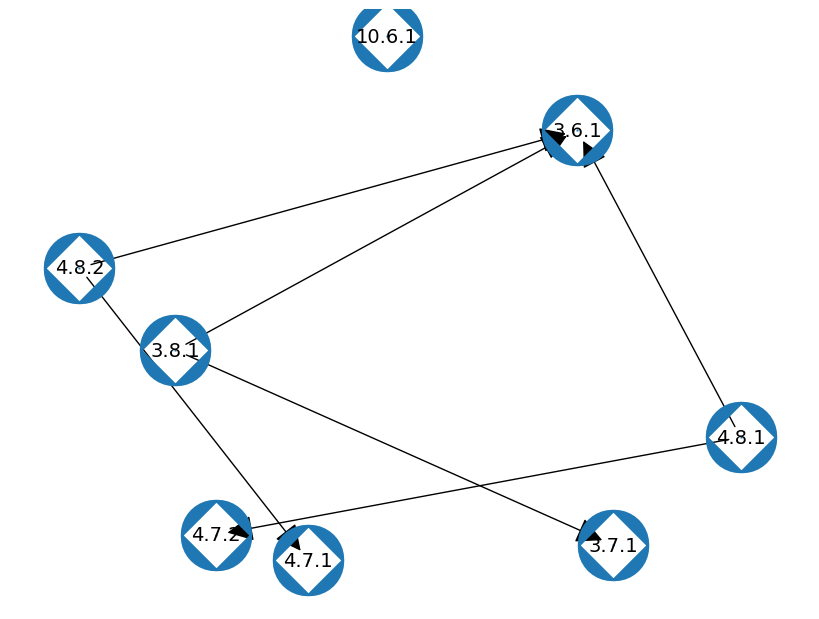

In [42]:
# Create a directed graph from the adjacency list
G2 = nx.DiGraph(adj_list2)

# Draw the directed graph
plt.figure(3,figsize=(8,6))
pos2 = nx.kamada_kawai_layout(G2)  # positions for all nodes
nx.draw(G2, pos2, with_labels = True, node_size=1, node_shape="s", alpha=1.0, linewidths=50, font_size=14, font_color="black", font_weight="normal", font_family="sans-serif", edgelist= [])

# Draw directed edges with arrows
nx.draw_networkx_edges(G2, pos2, arrowstyle='-|>', arrowsize=40, edge_color='black')

# Show the plot
plt.show()


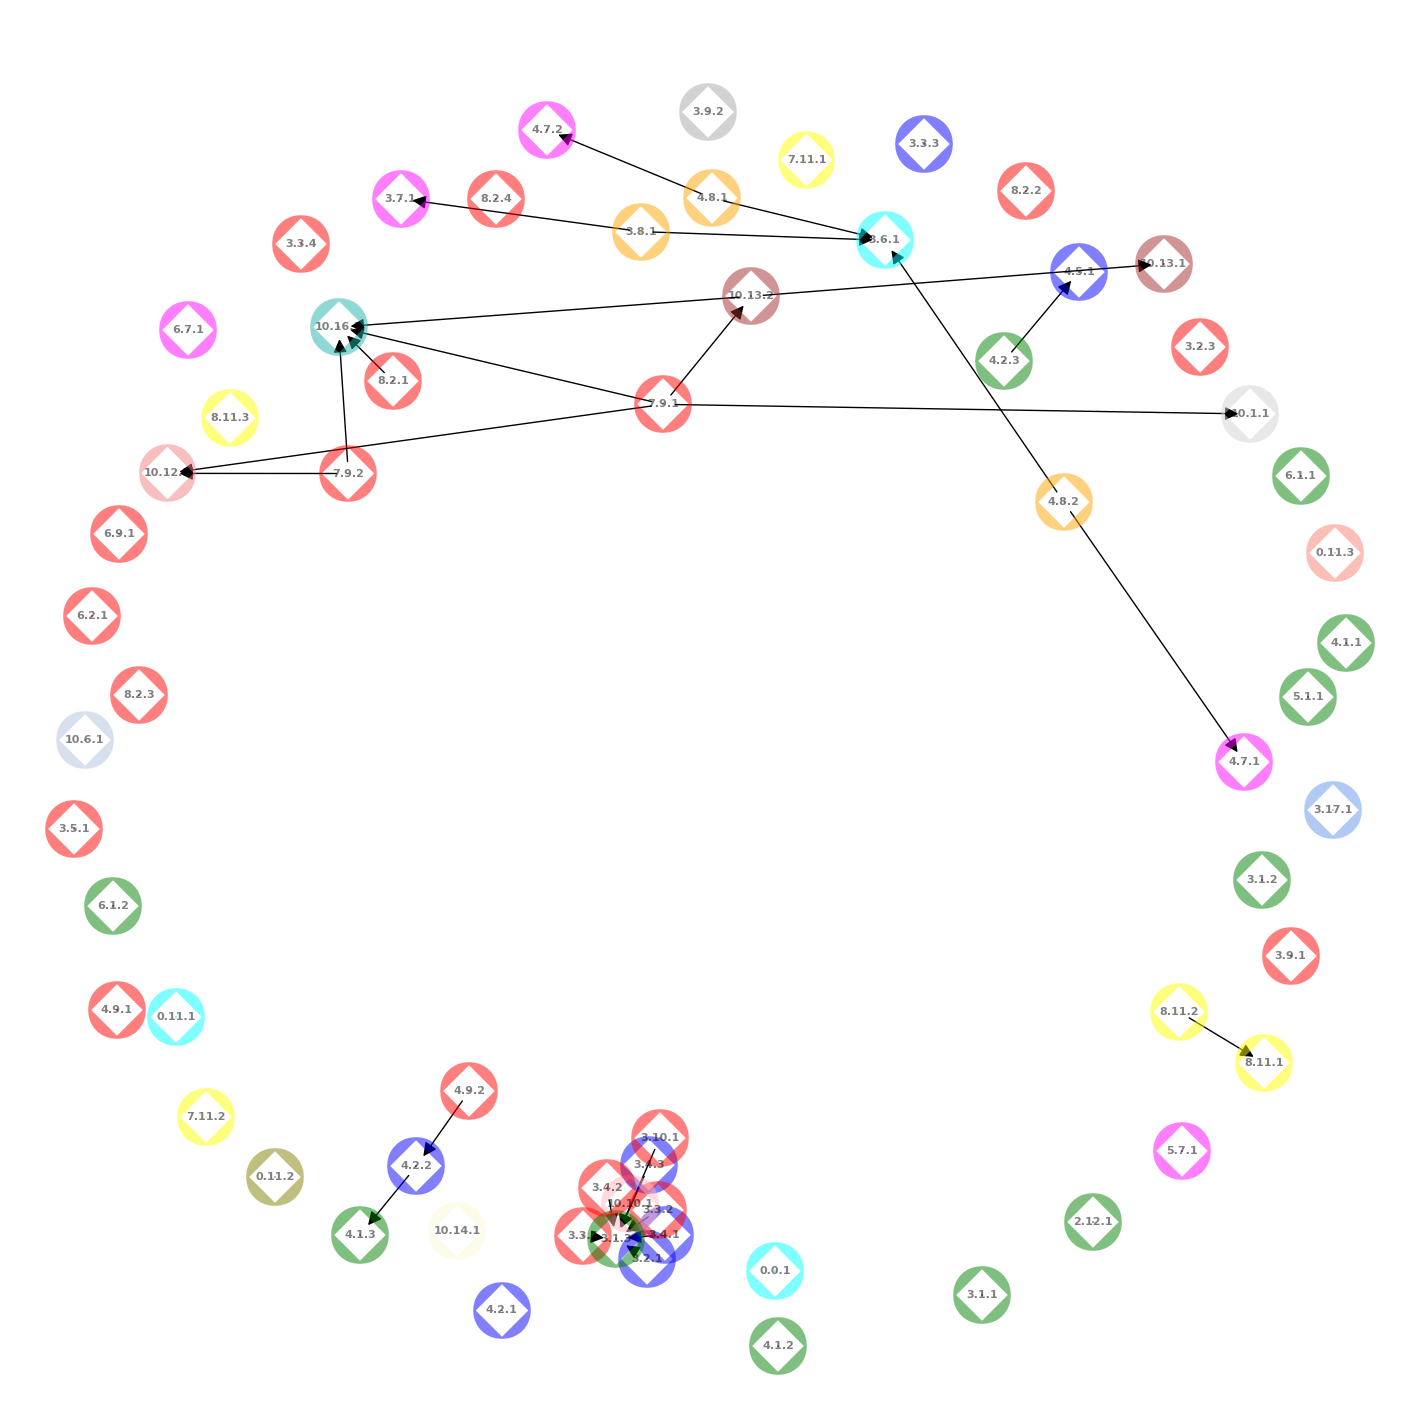

In [25]:
# Create a directed graph from the adjacency list
G = nx.DiGraph(adj_list)

# Draw the directed graph
plt.figure(3,figsize=(14,14))
pos = nx.spring_layout(G)  # positions for all nodes
# pos = nx.fruchterman_reingold_layout(G)  # positions for all nodes
nx.draw(G, pos, with_labels = True, node_size=2, node_color= node_colours, node_shape="s", alpha=0.5, linewidths=40, font_size=8, font_color="black", font_weight="bold", font_family="sans-serif", edgelist= [])
# nx.draw(G, pos, with_labels = True, node_size=2, node_color="skyblue", node_shape="s", alpha=0.5, linewidths=40, font_size=8, font_color="black", font_weight="bold", font_family="sans-serif", edge_color="white")

# Draw directed edges with arrows
nx.draw_networkx_edges(G, pos, arrowstyle='-|>', arrowsize=20, edge_color='black')

# Show the plot
plt.show()


## Clasificación de normas

In [26]:
# Import csv file with column names
dataFileName = 'clasificaciónNormas.csv' 
df = pd.read_csv(dataFileName, names=['Norma', 'Objetivo'])
df

,Norma,Objetivo
0,0.0.1,Instalaciones clase 1
1,0.11.1,Instalaciones clase 1
2,0.11.2,Autorización específica
3,0.11.3,Entrenamiento de personal
4,0.11.4,Licenciamiento
...,...,...
60,8.11.3,Permiso individual
61,8.2.1,Seguridad
62,8.2.2,Seguridad
63,8.2.3,Seguridad


In [27]:
sortedDF = df['Objetivo'].value_counts(normalize=True).mul(100).sort_values(ascending=False)
# sortedDF

Text(0, 0.5, '')

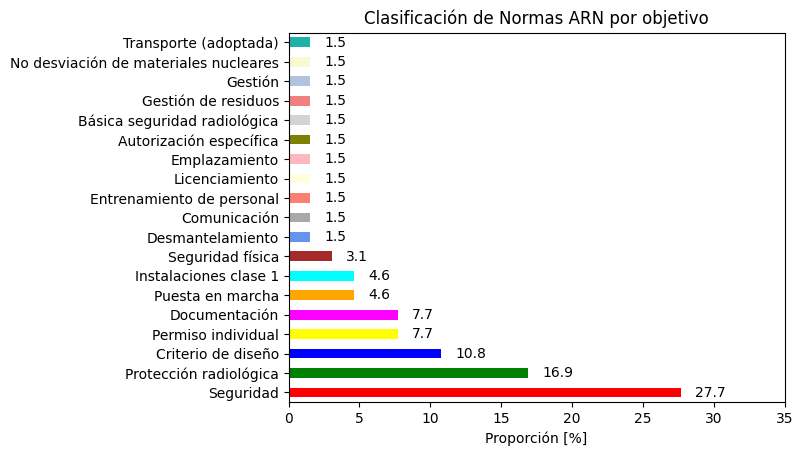

In [28]:
# same but using colormap
sortedDF.plot(kind='barh', color=[colour_map[i] for i in sortedDF.index])
# sortedDF.plot(kind='barh', color=plt.cm.get_cmap('tab20')(range(len(sortedDF))))
plt.xlabel('Proporción [%]')
plt.title('Clasificación de Normas ARN por objetivo')

# percentage values on right tip of bars
for i, v in enumerate(sortedDF):
    plt.text(v + 1, i, f'{v:.1f}', ha='left', va='center')
plt.xlim(0, 35)
plt.ylabel('')